### Project 1 — End-to-End ML Workflow 

This notebook orchestrates the full classification workflow:

1) **Load & Preprocess & Train/Val/Test Splits** 

2) **Model Showcases**  

3) **Evaluation**  
---

In [2]:
# set working directory to project root
import os
os.chdir("..")  # or full path to project root
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scripts.preprocess import preprocess_data, split_data, load_data
from scripts.perceptron_model import Perceptron
from scripts.adalinesgd_model import AdalineSGD

#### Preprocessing:

In [3]:
# read in data
raw_df = load_data("data/project_adult.csv")

# split into train and test
X_train, X_test, y_train, y_test = split_data(df=raw_df, target_column="income")

# preprocess the data
X_train_processed = preprocess_data(X_train)
X_test_processed = preprocess_data(X_test)

#### Training Perceptron and Adaline:

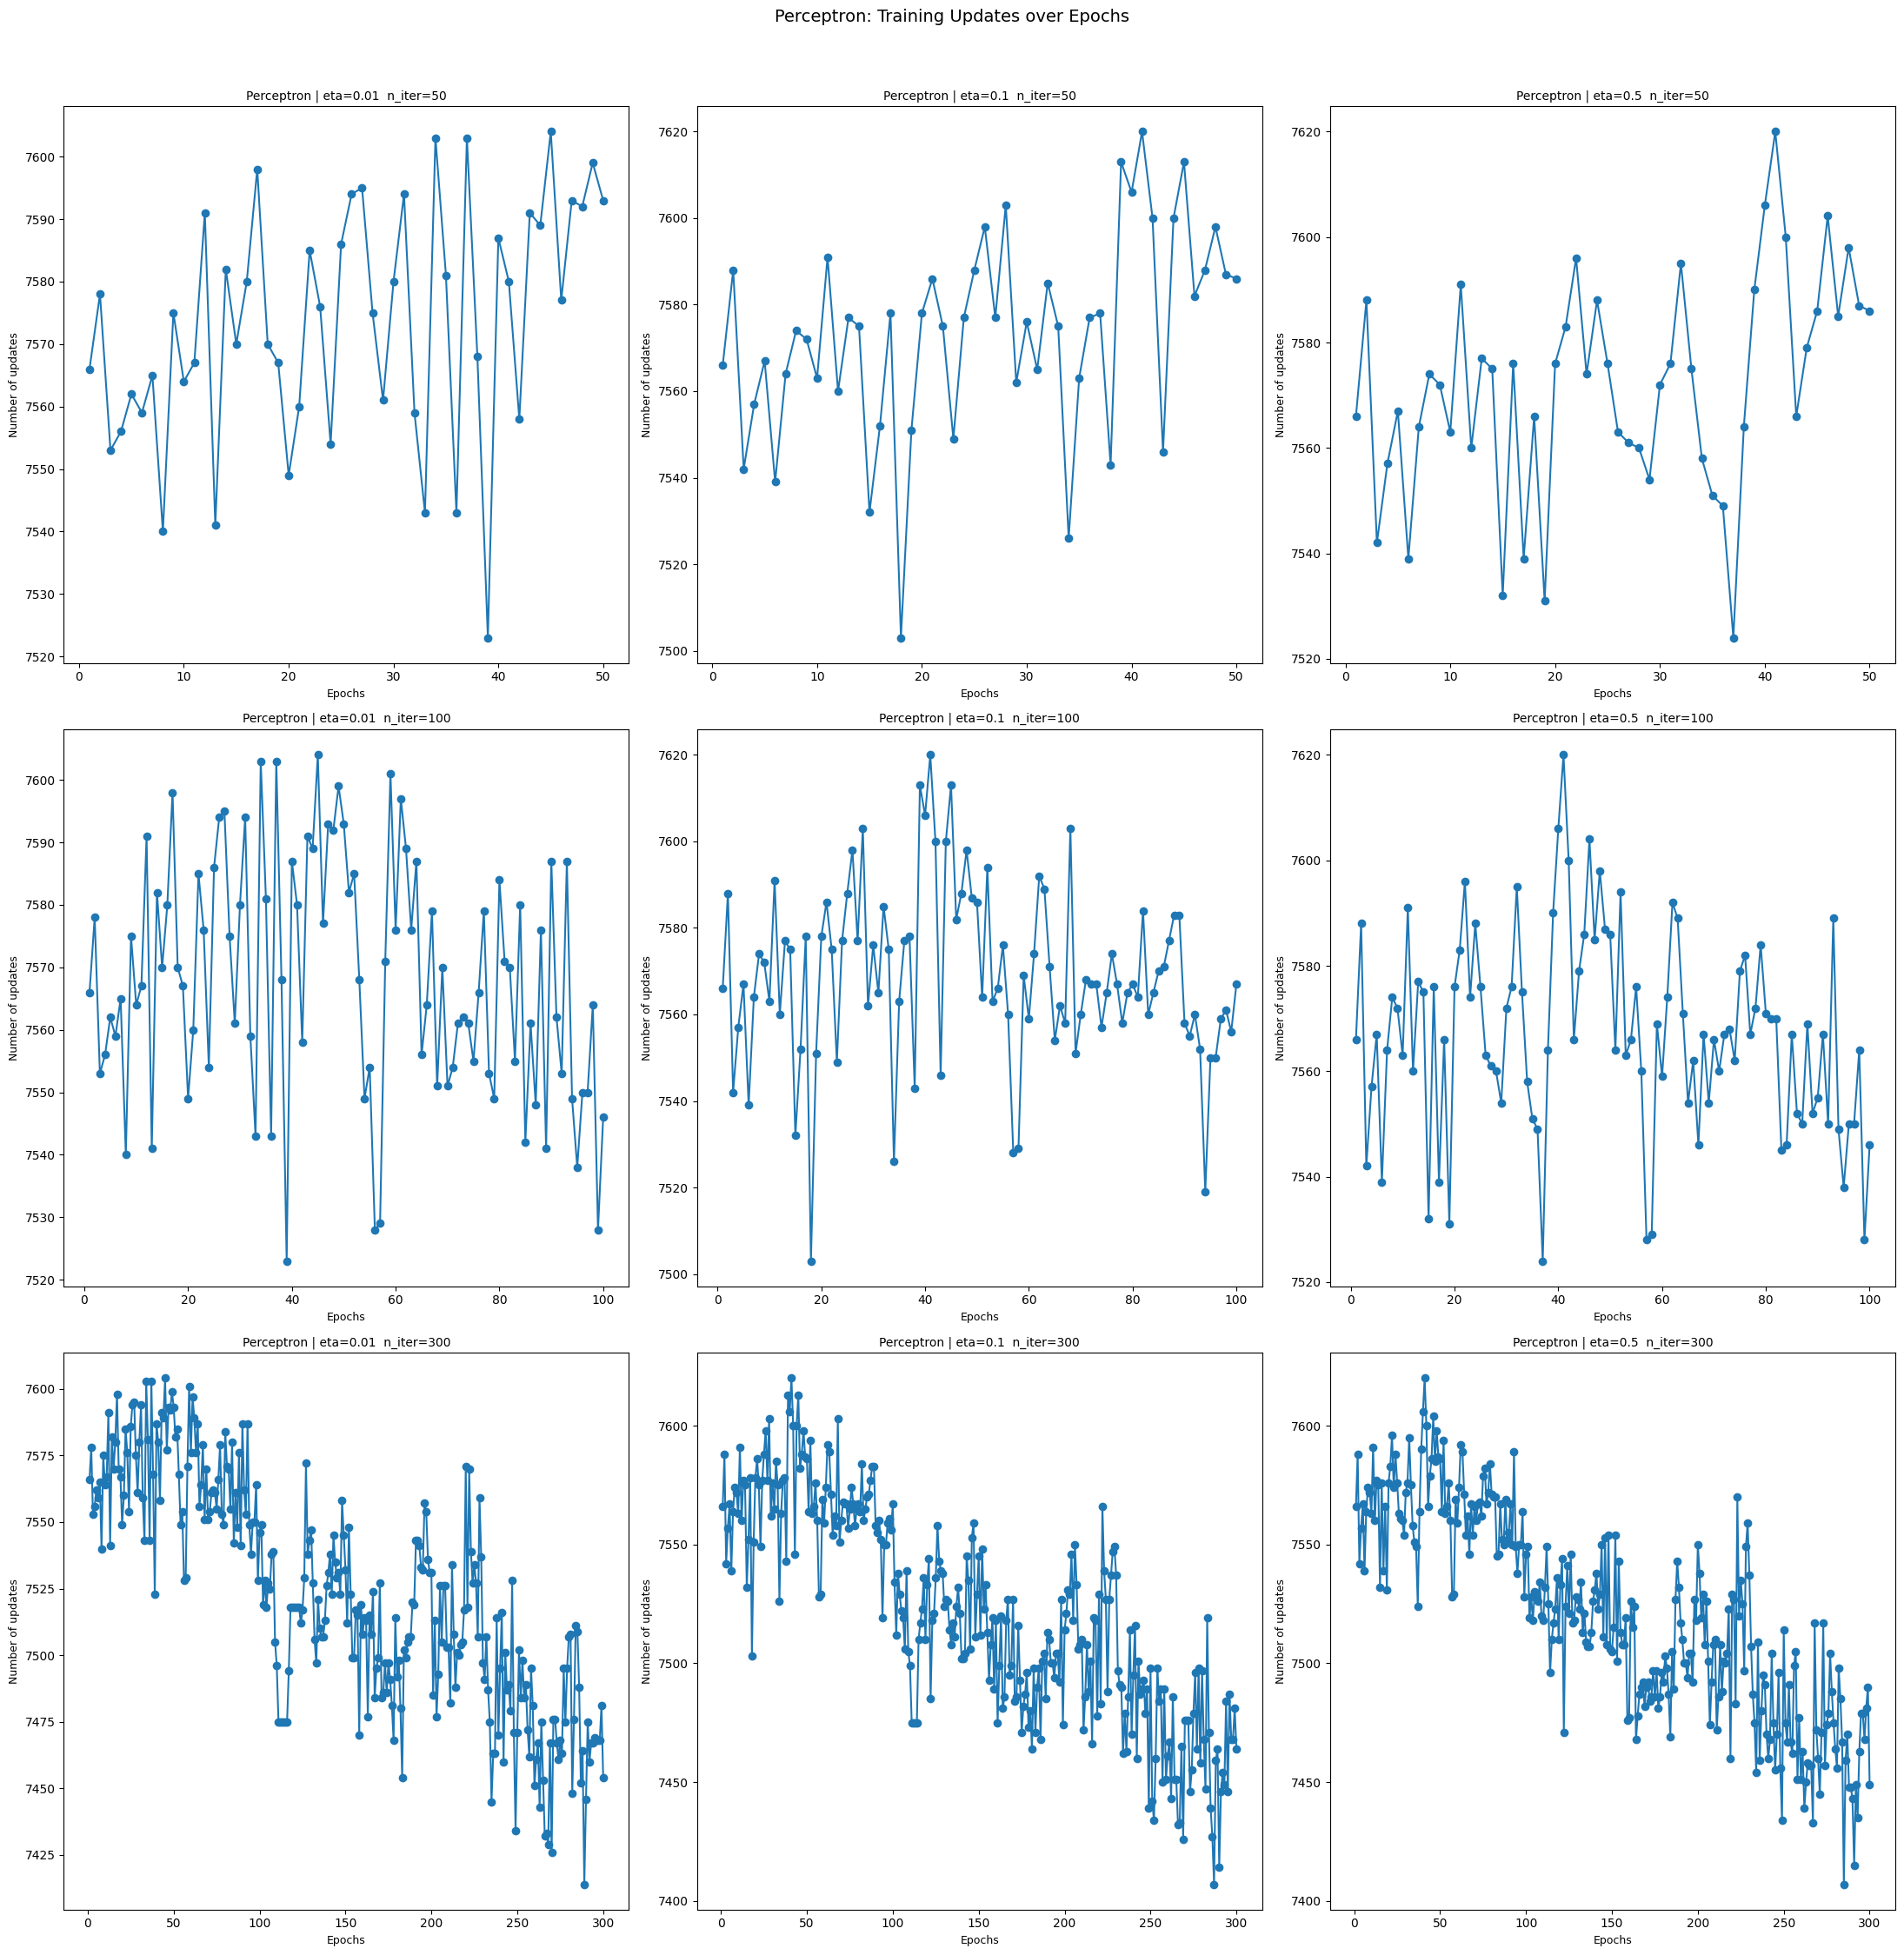

Perceptron best config: {'eta': 0.5, 'n_iter': 300} score: 7449


/Users/coymorris/Desktop/CURRENT CLASSES/DASC 41103 — Machine Learning /Project1/project1-foundations_of_classification_algorithms/scripts/adalinesgd_model.py:98: RuntimeWarning: overflow encountered in scalar power
  loss = error**2
/Users/coymorris/Desktop/CURRENT CLASSES/DASC 41103 — Machine Learning /Project1/project1-foundations_of_classification_algorithms/scripts/adalinesgd_model.py:103: RuntimeWarning: overflow encountered in dot
  return np.dot(X, self.w_) + self.b_
/Users/coymorris/Desktop/CURRENT CLASSES/DASC 41103 — Machine Learning /Project1/project1-foundations_of_classification_algorithms/scripts/adalinesgd_model.py:96: RuntimeWarning: invalid value encountered in multiply
  self.w_ += self.eta * 2.0 * xi * (error)
/Users/coymorris/Desktop/CURRENT CLASSES/DASC 41103 — Machine Learning /Project1/project1-foundations_of_classification_algorithms/scripts/adalinesgd_model.py:103: RuntimeWarning: invalid value encountered in dot
  return np.dot(X, self.w_) + self.b_
/Users/co

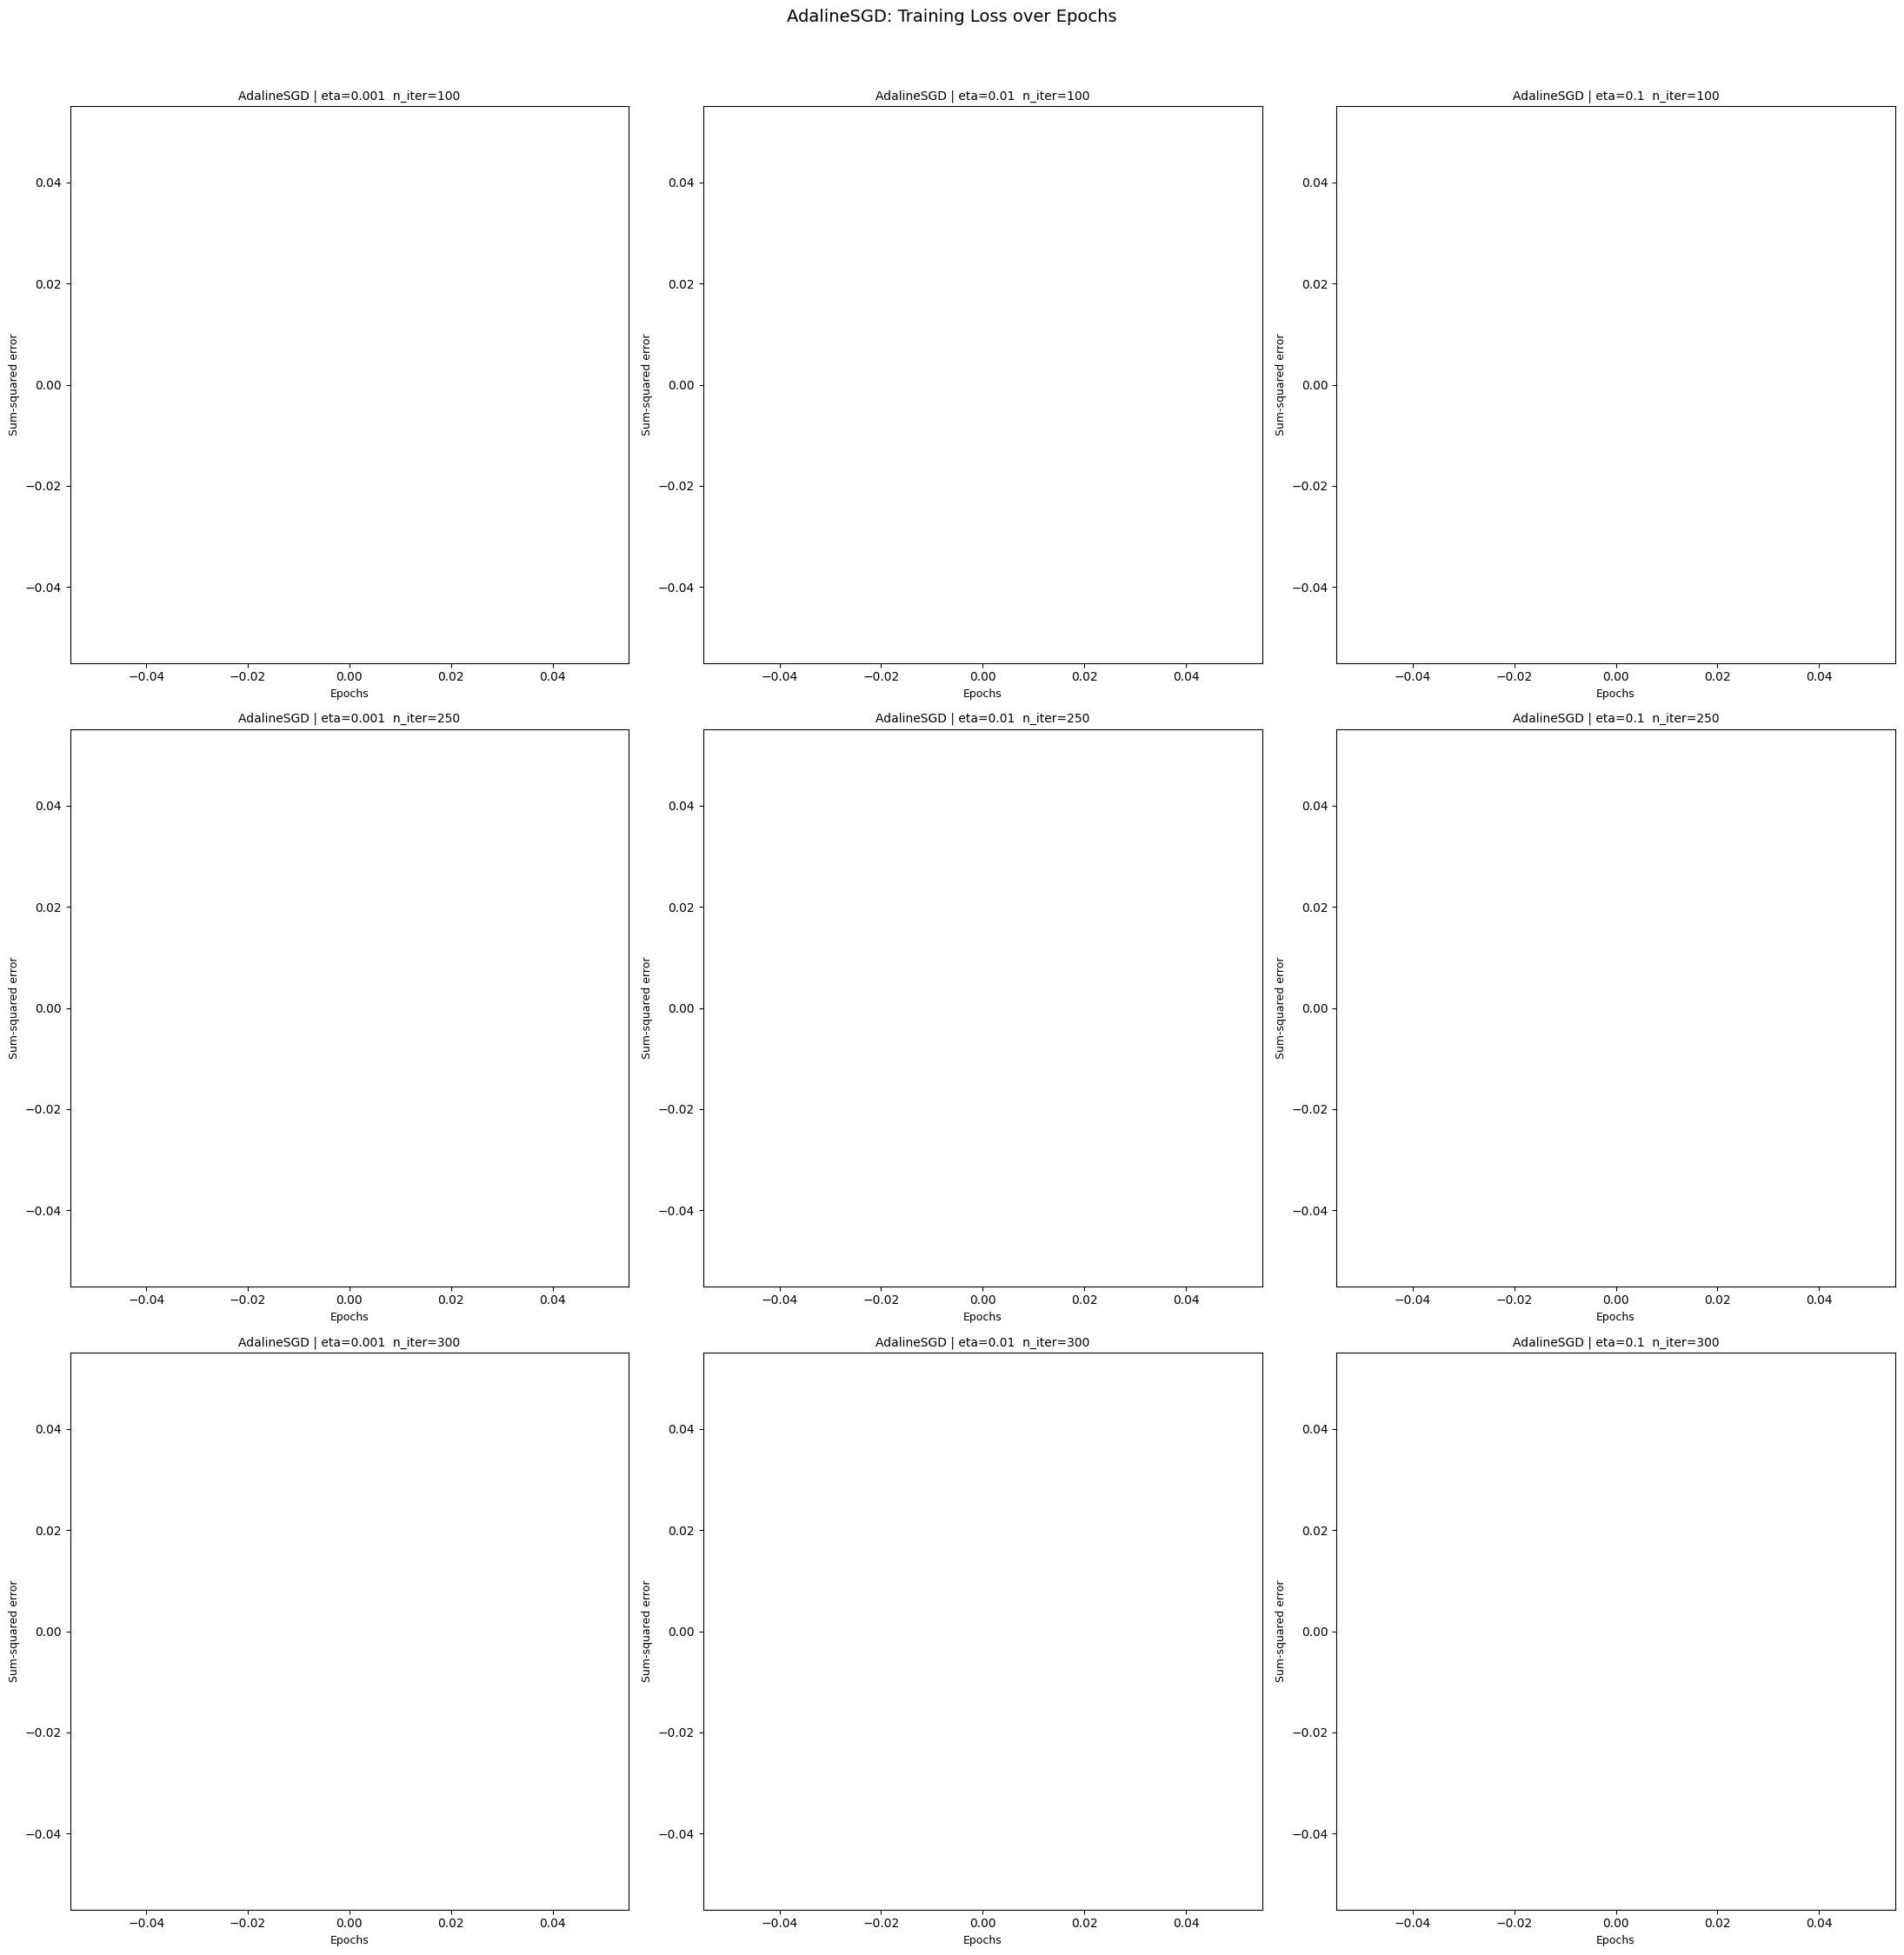

Adaline best config: None score: inf


In [7]:
# handbuilt perceptron and adaline models require data of different shape (numpy arrays)
X_train_perceptron = X_train_processed.values
y_train_perceptron = (y_train == ">50K").astype(int).values
y_train_perceptron = y_train_perceptron[~np.isnan(y_train_perceptron)]

# initialize perceptron and adaline models. iterate through learning rates and iterations to find best hyperparameters
perceptron_eta_list = [0.01, 0.1, 0.5]
perceptron_max_iter_list = [50, 100, 300]

adaline_eta_list = [0.001, 0.01, 0.1]
adaline_max_iter_list = [100, 250, 300]

# PERCEPTRON
fig, ax = plt.subplots(nrows=len(perceptron_max_iter_list), ncols=len(perceptron_eta_list), figsize=(22, 22))
best_ppn_score, best_ppn_cfg = np.inf, None
for r, n_iter in enumerate(perceptron_max_iter_list):
    for c, eta in enumerate(perceptron_eta_list):
        ppn = Perceptron(n_iter=n_iter, eta=eta)  # add shuffle/random_state if supported
        ppn.fit(X_train_perceptron, y_train_perceptron)
        hist = getattr(ppn, "errors_", [])
        if len(hist) > 0:
            ax[r, c].plot(range(1, len(hist)+1), hist, marker='o')
            last = hist[-1]
            if last < best_ppn_score:
                best_ppn_score, best_ppn_cfg = last, {"eta": eta, "n_iter": n_iter}
        ax[r, c].set_xlabel("Epochs", fontsize=9)
        ax[r, c].set_ylabel("Number of updates", fontsize=9)
        ax[r, c].set_title(f"Perceptron | eta={eta}  n_iter={n_iter}", fontsize=10)

fig.suptitle("Perceptron: Training Updates over Epochs", fontsize=14, y=1.02)
fig.tight_layout()
plt.show()
print("Perceptron best config:", best_ppn_cfg, "score:", best_ppn_score)

# ADALINE (SGD)
fig, ax = plt.subplots(nrows=len(adaline_max_iter_list), ncols=len(adaline_eta_list), figsize=(22, 22))
best_ada_score, best_ada_cfg = np.inf, None
for r, n_iter in enumerate(adaline_max_iter_list):
    for c, eta in enumerate(adaline_eta_list):
        ada = AdalineSGD(n_iter=n_iter, eta=eta)  # add shuffle/random_state if supported
        ada.fit(X_train_perceptron, y_train_perceptron)
        hist = getattr(ada, "losses_", [])
        if len(hist) > 0:
            ax[r, c].plot(range(1, len(hist)+1), hist, marker='o')
            last = hist[-1]
            if last < best_ada_score:
                best_ada_score, best_ada_cfg = last, {"eta": eta, "n_iter": n_iter}
        ax[r, c].set_xlabel("Epochs", fontsize=9)
        ax[r, c].set_ylabel("Sum-squared error", fontsize=9)
        ax[r, c].set_title(f"AdalineSGD | eta={eta}  n_iter={n_iter}", fontsize=10)

fig.suptitle("AdalineSGD: Training Loss over Epochs", fontsize=14, y=1.02)
fig.tight_layout()
plt.show()
print("Adaline best config:", best_ada_cfg, "score:", best_ada_score)